In [2]:
import os

root = "monkbrill2"
for letterFolder in os.listdir(root):
    path = os.path.join(root, letterFolder)
    files = os.listdir(path)
    print(len(files), letterFolder)

300 Alef
300 Ayin
300 Bet
91 Dalet
300 Gimel
300 He
300 Het
193 Kaf
10 Kaf-final
294 Lamed
300 Mem
300 Mem-medial
130 Nun-final
300 Nun-medial
37 Pe
15 Pe-final
265 Qof
78 Resh
300 Samekh
300 Shin
300 Taw
300 Tet
73 Tsadi-final
300 Tsadi-medial
116 Waw
23 Yod
12 Zayin


In [1]:
from segment import Segment
import matplotlib.pyplot as plt

segmenter = Segment(input_folder="image-data")
morph = segmenter.segment_characters()

'processing image 0 out of 20'
(2706, 3608, 3)


AttributeError: 'int' object has no attribute 'write'

In [1]:
from segment import Segment

#if __name__ == "__main__":
    #a = Segment()
    #a = Segment("/home/lucypher/Desktop/HandRec/Project/image-data/image-data")
a = Segment("image-data")
a.segment_characters(real_data=True, generated_data=False)

'processing image 0 out of 20'
'processing image 1 out of 20'
'processing image 2 out of 20'
'processing image 3 out of 20'
'processing image 4 out of 20'
'processing image 5 out of 20'
'processing image 6 out of 20'
'processing image 7 out of 20'
'processing image 8 out of 20'
'processing image 9 out of 20'
'processing image 10 out of 20'
'processing image 11 out of 20'
'processing image 12 out of 20'
'processing image 13 out of 20'
'processing image 14 out of 20'
'processing image 15 out of 20'
'processing image 16 out of 20'
'processing image 17 out of 20'
'processing image 18 out of 20'
'processing image 19 out of 20'


In [ ]:
cv2.im

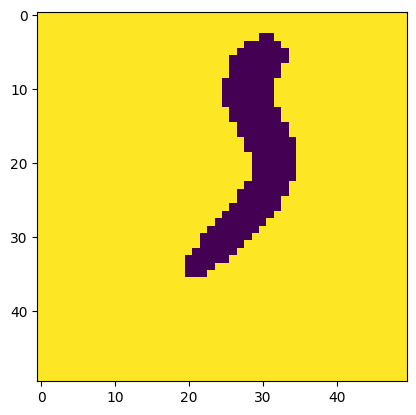

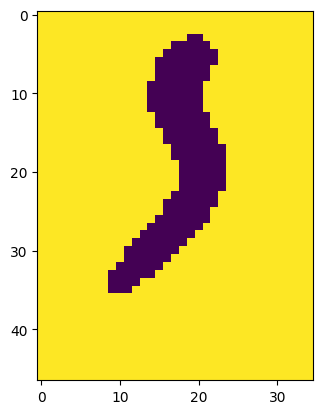

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# crops the image down to only where the text is (i.e. removes whitespace)
# 'padding' indicates how many pixels of whitespace to keep around the far edges of boudning box containing all of the text
def whitespaceRemover(filename, padding=10):  
    gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE) # Read in the image and convert to grayscale
    imHeight, imWidth = gray.shape # get the image dimensions
    
    gray = 255*(gray < 128).astype(np.uint8) # To invert the text to white
    gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, np.ones((2, 2), dtype=np.uint8)) # Perform noise filtering
    coords = cv2.findNonZero(gray) # Find all non-zero points (text)
    x, y, w, h = cv2.boundingRect(coords) # Find minimum spanning bounding box

    # pad each side
    y_min = y-padding if y-padding>=0 else 0
    y_max = y+h+padding if y+h+padding<=imHeight else imHeight
    x_min = x-padding if x-padding>=0 else 0
    x_max = x+w+padding if x+w+padding<=imWidth else imWidth

    rect = img[y_min:y_max, x_min:x_max] # Crop the image - note we do this on the original image
    
    return rect

path = "Data/Letters/train/Nun-final/Nun-final_12_348.png"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show()
img = whitespaceRemover(path)
plt.imshow(img)
plt.show()

# Removing duplicates

In [38]:
temp = [True, False, True]
sum(temp)

2

In [127]:
import os
from collections import Counter
import shutil
import matplotlib.pyplot as plt

goodOutputsFolder = "Data\\letters_temp"
os.makedirs(goodOutputsFolder, exist_ok = True)
badOutputsFolder = "Data\\shit"
os.makedirs(badOutputsFolder, exist_ok = True)

root = "monkbrill2/"
extracts = []
shapesDict = {}

positionThreshold = 50
dimensionThreshold = 5

kept_list = []
discarded_list = []
letter_classes = []

print("kept, discarded, letter class")

for folder in os.listdir(root):
    discarded = 0
    kept = 0
    folder_path = os.path.join(root, folder)
    
    for filename in os.listdir(folder_path):
        split = filename.split("-")[9:13]
        file_path = os.path.join(folder_path, filename)

        target_folder = os.path.join(goodOutputsFolder, folder)
        os.makedirs(target_folder, exist_ok = True)
        target_file_path = os.path.join(target_folder, filename)

        try: # there are two files in the whole monkbrill2 folder that have a different naming convention (but they are both safe to keep without dataset leakage)

            x_pos, y_pos = int(split[0].split("=")[1]), int(split[1].split("=")[1])
            width, height = int(split[2].split("=")[1]), int(split[3].split("=")[1])
        
            extract_file = filename.split("-")[2]  # which DSS extract this letter image came from

            if extract_file in shapesDict.keys():
                seen_before = False
                for know_img in shapesDict[extract_file]:
                    [known_x, known_y, known_width, known_height] = know_img
                    # if their x, y positions are similar, AND they have similar image dimensions; ignore this image
                    if abs(known_x - x_pos) < positionThreshold and abs(known_width - width) < dimensionThreshold:
                        if abs(known_y - y_pos) < positionThreshold and abs(known_height - height) < dimensionThreshold:
                            seen_before = True
                            break
                                
                if not seen_before:
                    shapesDict[extract_file].append([x_pos, y_pos, width, height])
                    shutil.copy(file_path, target_file_path)
                    kept +=1
                else: 
                    discarded += 1
                    target_file_path = os.path.join(badOutputsFolder, filename)
                    shutil.copy(file_path, target_file_path)

            else:
                shapesDict[extract_file] = [[x_pos, y_pos, width, height]]
                kept +=1
                
                shutil.copy(file_path, target_file_path)
        #extracts.append(split2)
        #print(x_pos, y_pos)
        #print(width, height)
        except:
            #print(filename)
            kept +=1
            shutil.copy(file_path, target_file_path)


    print(kept, discarded, folder)
    kept_list.append(kept)
    discarded_list.append(discarded)
    letter_classes.append(folder)

kept, discarded, letter class
255 45 Alef
248 52 Ayin
250 50 Bet
74 17 Dalet
253 47 Gimel
259 41 He
247 53 Het
169 24 Kaf
9 1 Kaf-final
276 18 Lamed
256 44 Mem
245 55 Mem-medial
122 8 Nun-final
253 47 Nun-medial
30 7 Pe
15 0 Pe-final
234 31 Qof
66 12 Resh
249 51 Samekh
220 80 Shin
230 70 Taw
228 72 Tet
62 11 Tsadi-final
230 70 Tsadi-medial
100 16 Waw
18 5 Yod
11 1 Zayin


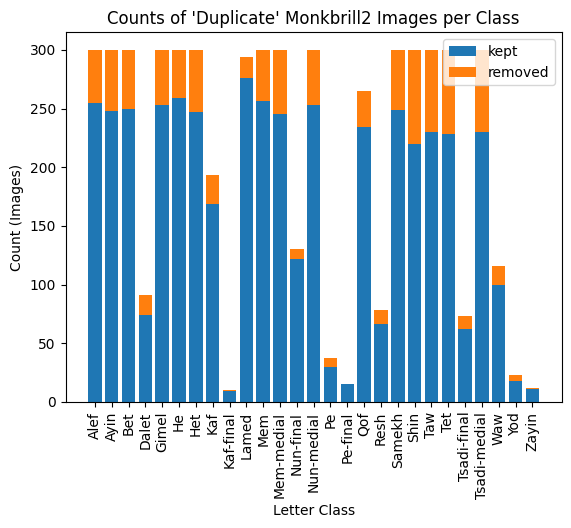

In [128]:
#p1 = plt.bar(letter_classes, kept_list, width, color='b')
#p2 = plt.bar(letter_classes, discarded_list, width, bottom=kept_list, color='r')

fig, ax = plt.subplots()

# Stacked bar chart
ax.bar(letter_classes, kept_list)
ax.bar(letter_classes, discarded_list, bottom = kept_list)

plt.legend(["kept", "removed"])
plt.xticks(rotation = 90)
plt.xlabel("Letter Class")
plt.ylabel("Count (Images)")
plt.title("Counts of 'Duplicate' Monkbrill2 Images per Class")
plt.show()

In [ ]:
from PIL import Image, ImageFont, ImageDraw, ImageChops
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import math
import cv2

path ="Data/dssLetters/train_copy/He/navis-QIrug-Qumran_extr09_2024-line-024-y1=863-y2=981-zone-HUMAN-x=1481-y=0038-w=0036-h=0039-ybas=0057-nink=572-segm=COCOS5cocos.jpg"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img_size = img.shape
print(img_size)

whiteImage = Image.new('L', img_size, 255) 

img = Image.fromarray(img)
# to make the image grainy, use this mask. p is the probability that each pixel is made to be white (hence removing parts of the letters)
p = 0.4
mask = np.random.rand(img_size[0], img_size[1]) > p
mask = Image.fromarray(mask)

#img = ImageChops.composite(img, whiteImage, mask) 


img = np.array(img) 

kernel = np.ones((2, 2), np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=2)

plt.imshow(img, cmap='gray')